In [1]:
!pip install -q yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-08-28,133.779999,133.949997,131.850006,133.139999,133.139999,34108400,AMAZON
2023-08-29,133.380005,135.139999,133.250000,134.910004,134.910004,38646100,AMAZON
2023-08-30,134.929993,135.679993,133.919998,135.070007,135.070007,36137000,AMAZON
2023-08-31,135.059998,138.789993,135.000000,138.009995,138.009995,58781300,AMAZON
2023-09-01,139.460007,139.960007,136.880005,138.119995,138.119995,40948300,AMAZON
2023-09-05,137.729996,137.800003,135.820007,137.270004,137.270004,40636700,AMAZON
2023-09-06,136.320007,137.449997,134.610001,135.360001,135.360001,41785500,AMAZON
2023-09-07,133.899994,138.029999,133.160004,137.850006,137.850006,48498900,AMAZON
2023-09-08,136.860001,138.850006,136.750000,138.229996,138.229996,38348200,AMAZON


In [3]:
color_pal=sns.color_palette()
color_pal

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

/tmp/ipykernel_20/1060887869.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i)


<Figure size 1500x1200 with 0 Axes>

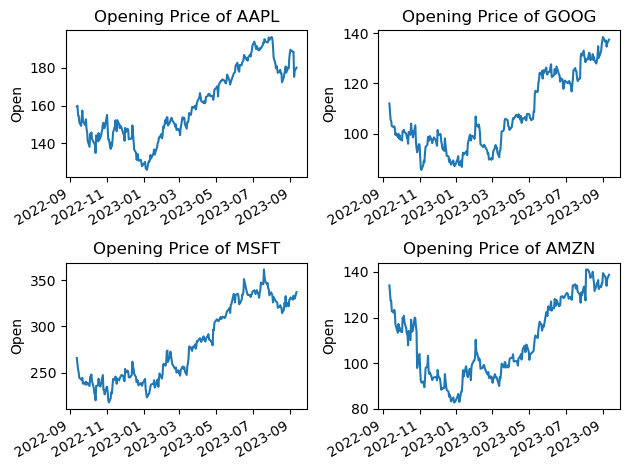

In [4]:
plt.figure(figsize=(15, 12))
plt.subplots()

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Open'].plot()
    plt.ylabel('Open')
    plt.xlabel(None)
    plt.title(f"Opening Price of {tech_list[i - 1]}")
    
plt.tight_layout()

/tmp/ipykernel_20/4014114630.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i)


<Figure size 1500x1200 with 0 Axes>

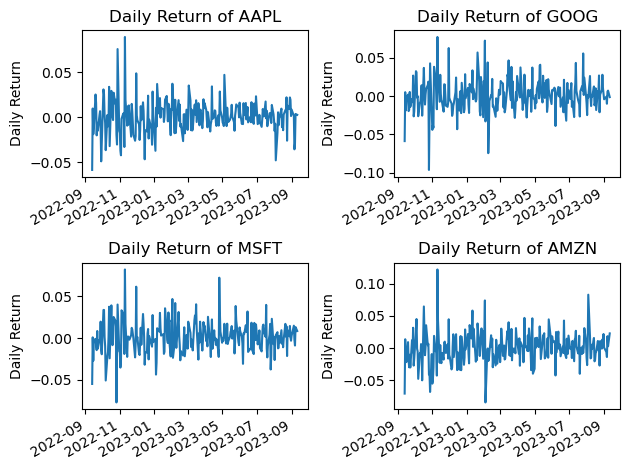

In [5]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

plt.figure(figsize=(15, 12))
plt.subplots()

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].plot()
    plt.ylabel('Daily Return')
    plt.xlabel(None)
    plt.title(f"Daily Return of {tech_list[i - 1]}")
    
plt.tight_layout()

/tmp/ipykernel_20/1086156345.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i)


<Figure size 1500x1200 with 0 Axes>

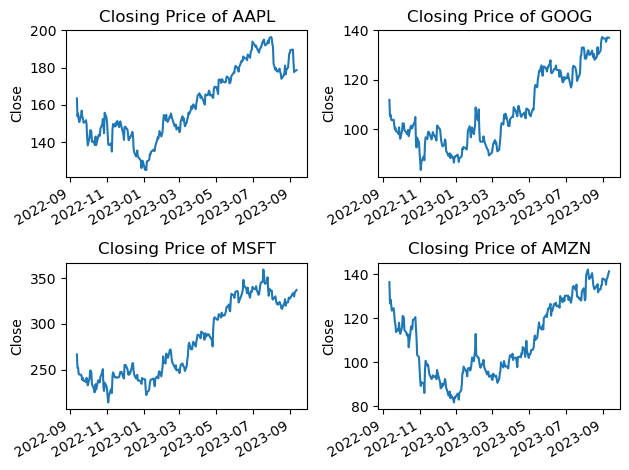

In [6]:
plt.figure(figsize=(15, 12))
plt.subplots()

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

In [7]:
##This is an example:
##df['Open:30 days rolling']=df['Open'].rolling(window=10, min_periods=1).mean()

<Figure size 1500x1200 with 0 Axes>

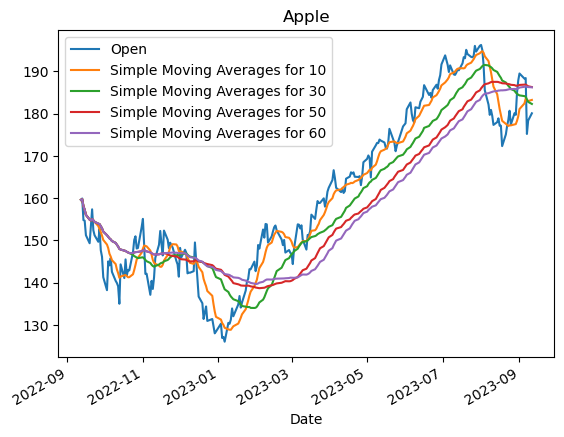

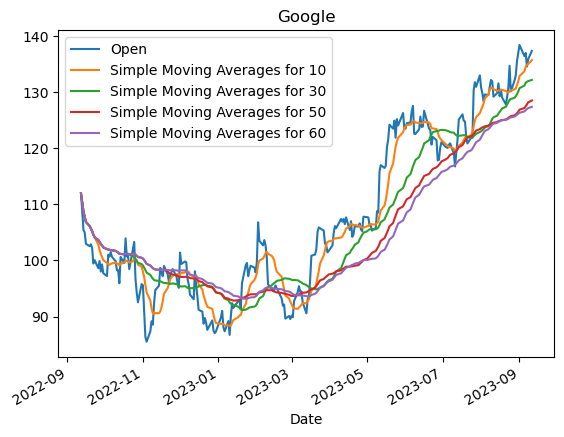

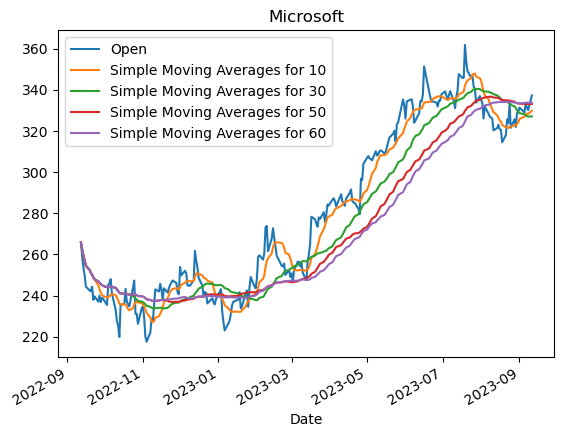

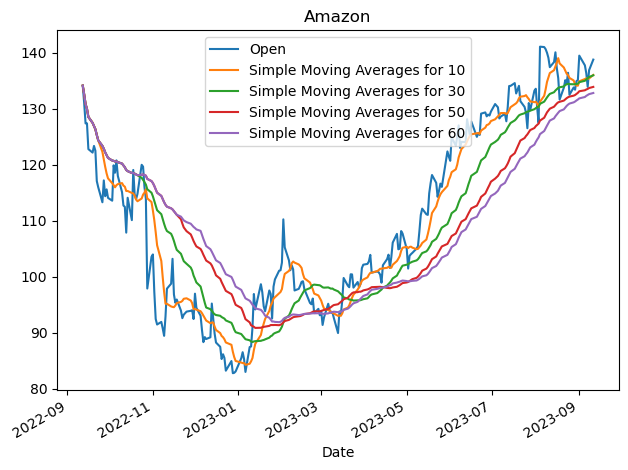

In [8]:
window=[10,30,50,60]

for ma_avg in window:
    for company in company_list:
        column=f"Simple Moving Averages for {ma_avg}"
        company[column]=company['Open'].rolling(ma_avg, min_periods=1).mean() #we need to use an aggregate function so here we are using average
        
plt.figure(figsize=(15, 12))

AAPL[['Open', 'Simple Moving Averages for 10', 'Simple Moving Averages for 30', 'Simple Moving Averages for 50', 'Simple Moving Averages for 60']].plot()
plt.title('Apple')

GOOG[['Open', 'Simple Moving Averages for 10', 'Simple Moving Averages for 30', 'Simple Moving Averages for 50', 'Simple Moving Averages for 60']].plot()
plt.title('Google')

MSFT[['Open', 'Simple Moving Averages for 10', 'Simple Moving Averages for 30', 'Simple Moving Averages for 50', 'Simple Moving Averages for 60']].plot()
plt.title('Microsoft')

AMZN[['Open', 'Simple Moving Averages for 10', 'Simple Moving Averages for 30', 'Simple Moving Averages for 50', 'Simple Moving Averages for 60']].plot()
plt.title('Amazon')

plt.tight_layout()

<Figure size 1500x1200 with 0 Axes>

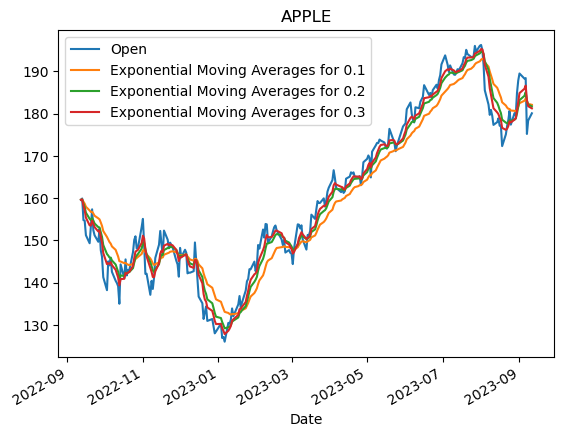

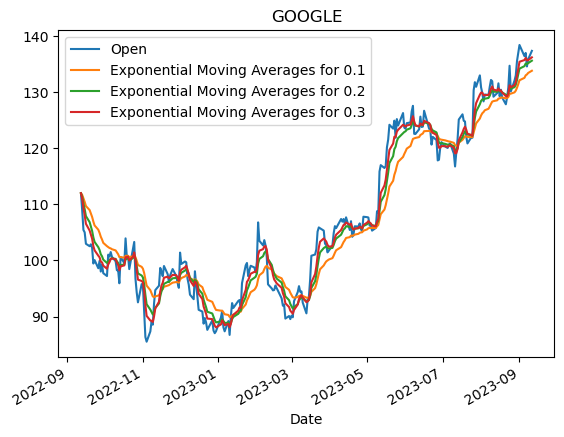

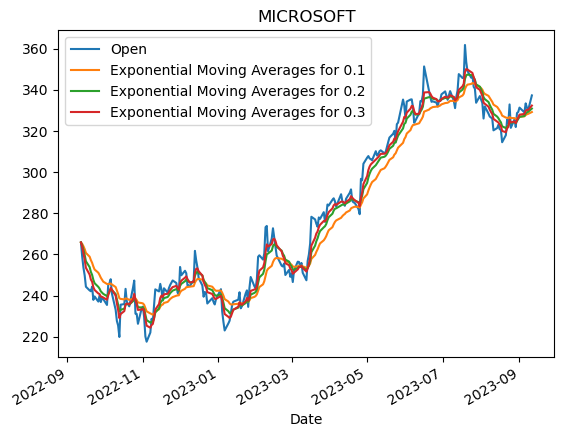

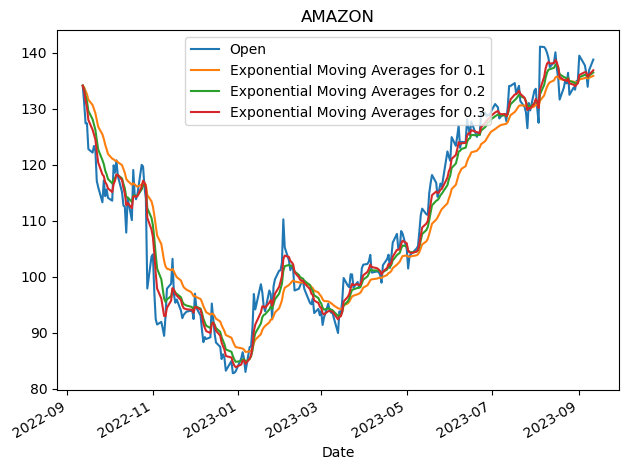

In [9]:
sf=[0.1,0.2,0.3]

for s_factor in sf:
    for company in company_list:
        column=f"Exponential Moving Averages for {s_factor}"
        company[column]=company['Open'].ewm(alpha=s_factor, adjust=False).mean() #we need to use an aggregate function so here we are using average
        
plt.figure(figsize=(15, 12))

AAPL[['Open', 'Exponential Moving Averages for 0.1','Exponential Moving Averages for 0.2', 'Exponential Moving Averages for 0.3']].plot()
plt.title('APPLE')

GOOG[['Open', 'Exponential Moving Averages for 0.1','Exponential Moving Averages for 0.2', 'Exponential Moving Averages for 0.3']].plot()
plt.title('GOOGLE')

MSFT[['Open', 'Exponential Moving Averages for 0.1','Exponential Moving Averages for 0.2', 'Exponential Moving Averages for 0.3']].plot()
plt.title('MICROSOFT')

AMZN[['Open', 'Exponential Moving Averages for 0.1','Exponential Moving Averages for 0.2', 'Exponential Moving Averages for 0.3']].plot()
plt.title('AMAZON')

plt.tight_layout()

In [10]:
data = df.filter(['Close'])
#The values property returns all values in the DataFrame. 
#The return value is a 2-dimensional array with one array for each row.
new_df=data.values
training_data_len = int(np.ceil( len(new_df) * .95 ))

training_data_len

954

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(new_df)
scaled=scaler.fit_transform(new_df)

In [12]:
length=len(scaled)

In [13]:
train_data = scaled[0:training_data_len, :]

X_train = []
y_train = []


for i in range(60, length):  
    #to add the previous values to X_train of the prediction days 
    X_train.append(scaled[i - 60:i, 0])
    #adding current values to y train of the prediction day 
    y_train.append(scaled[i, 0])

# Convert the x_train and y_train lists to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [15]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='MSE')

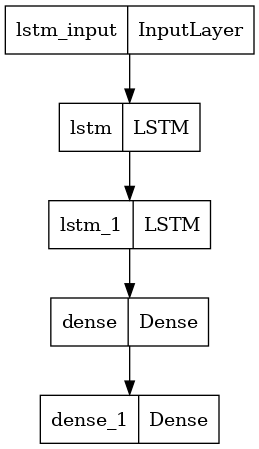

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train, y_train, batch_size=10, epochs=8)

Epoch 1/8
95/95 [==============================] - 12s 75ms/step - loss: 0.0110
Epoch 2/8
95/95 [==============================] - 7s 74ms/step - loss: 0.0037
Epoch 3/8
95/95 [==============================] - 7s 72ms/step - loss: 0.0031
Epoch 4/8
95/95 [==============================] - 7s 71ms/step - loss: 0.0029
Epoch 5/8
95/95 [==============================] - 7s 78ms/step - loss: 0.0032
Epoch 6/8
95/95 [==============================] - 7s 75ms/step - loss: 0.0022
Epoch 7/8
95/95 [==============================] - 7s 73ms/step - loss: 0.0020
Epoch 8/8
95/95 [==============================] - 7s 72ms/step - loss: 0.0021


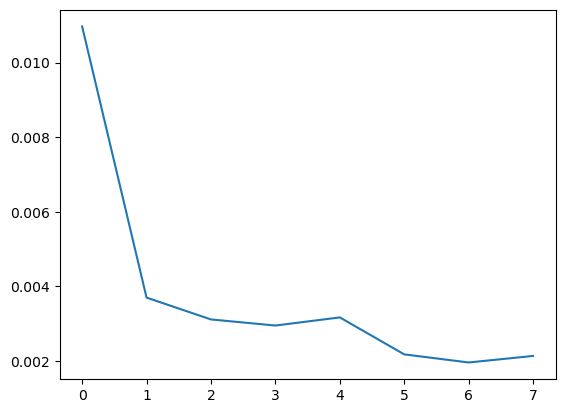

In [19]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)
#Losses significantly decreased

In [20]:
test_data = scaled[training_data_len - 60: , :]
# Create the data sets x_test and y_test
X_test = []
y_test = new_df[training_data_len:, :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 20ms/step


3.554092846916658

In [21]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

valid

/tmp/ipykernel_20/769977456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


,Close,Predictions
Date,,
2023-06-30,130.360001,130.894257
2023-07-03,130.220001,131.266006
2023-07-05,130.380005,131.713989
2023-07-06,128.360001,132.127182
2023-07-07,129.779999,131.884125
2023-07-10,127.129997,131.797684
2023-07-11,128.779999,131.095749
2023-07-12,130.800003,130.751862
2023-07-13,134.300003,131.188873


In [22]:
model.save('Stock_Prices.h5')